Referências:

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://github.com/s-miller/Spam-classification-comparing-Naive-Bayes-vs-random-forest-and-playing-around-with-sklearn-pipeline/blob/master/Spam%20classification%20comparing%20Naive%20Bayes%20vs%20random%20forest%20(and%20playing%20around%20with%20sklearn%20pipelining).ipynb

In [107]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

'''Modelos'''
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [108]:
def process_text(txt:str):
    '''Função que recebe o tweet e remove stopwords'''
    return [word for word in txt.split() if word not in stopwords.words('portuguese')]

In [109]:
tt = pd.read_csv('DebateGovRS_Anotado.xlsx - DebateGovRS_Anotado.csv').fillna(2)
tt.head()

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,Periga o Argenta chamar o Simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,RT @WinstonLing Segue o link para assistirem o...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [110]:
'''Seleciona somente os tweets classificados'''
tt = tt.loc[tt['sinal'].notna()]
tt.head()

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,RT @EdegarPretto O meu candidato vice-governad...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,Periga o Argenta chamar o Simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,RT @WinstonLing Segue o link para assistirem o...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,RT @EdegarPretto Eu quero dizer aos gaúchos e ...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,@wmfigueiredo @evertonvf @bandrs @EduardoLeite...,0.0


In [111]:
'''Remove acentos e caracteres especiais / Coloca em minúscula'''
tt['text'] = tt['text'].str.lower().str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')
tt['text']

0       rt @edegarpretto o meu candidato vice-governad...
1       periga o argenta chamar o simon pra responder ...
2       rt @winstonling segue o link para assistirem o...
3       rt @edegarpretto eu quero dizer aos gauchos e ...
4       @wmfigueiredo @evertonvf @bandrs @eduardoleite...
                              ...                        
2995    rt @josenery53 @sigapepevargas @dilmaresiste @...
2996                            @onyxlorenzoni realmente 
2997    rt @bandrs band mantem tradicao e realiza o pr...
2998    rt @edegarpretto o debate comecou e voce pode ...
2999    @edegarpretto tem 51 anos e nasceu em miraguai...
Name: text, Length: 3000, dtype: object

In [112]:
'''Remove '\n', @, RT, #'''
tt['text'] = tt['text'].replace(to_replace=r'\\n',value=' ',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'(?<!\w)@[\w+]{1,100}\b',value='',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'^rt\s',value='',regex=True)
tt['text'] = tt['text'].replace(to_replace=r'(?<!\w)#[\w+]{1,100}\b',value='',regex=True)
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se e...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando for...,0.0
...,...,...,...,...,...,...,...
2995,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0
2996,"1,37E+18",2022-08-08T00:00:05Z,"1,56E+18",pt,0,realmente,2.0
2997,"1,19E+18",2022-08-08T00:00:04Z,"1,56E+18",pt,244,band mantem tradicao e realiza o primeiro deb...,2.0
2998,54790300,2022-08-08T00:00:01Z,"1,56E+18",pt,20,o debate comecou e voce pode acompanhar todos...,2.0


In [113]:
'''Remove espaços desnecessários'''
tt['text'] = tt['text'].str.rstrip().str.lstrip().str.replace('  ',' ')

In [114]:
'''Remove textos vazios'''
tt = tt[tt['text']!='']
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador t...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje ...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se eu...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando forem p...,0.0
...,...,...,...,...,...,...,...
2995,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0
2996,"1,37E+18",2022-08-08T00:00:05Z,"1,56E+18",pt,0,realmente,2.0
2997,"1,19E+18",2022-08-08T00:00:04Z,"1,56E+18",pt,244,band mantem tradicao e realiza o primeiro deba...,2.0
2998,54790300,2022-08-08T00:00:01Z,"1,56E+18",pt,20,o debate comecou e voce pode acompanhar todos ...,2.0


In [115]:
'''Remove registros repetidos'''
tt = tt.drop_duplicates(subset=['text'])
tt.reset_index(drop=True,inplace=True)
tt

,author_id,created_at,id,lang,retweet_count,text,sinal
0,"1,46E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,45,o meu candidato vice-governador e o fundador t...,1.0
1,"1,51E+18",2022-08-08T01:08:23Z,"1,56E+18",pt,0,periga o argenta chamar o simon pra responder ...,2.0
2,"1,06E+18",2022-08-08T01:08:21Z,"1,56E+18",pt,14,segue o link para assistirem o debate de hoje ...,1.0
3,"7,15E+17",2022-08-08T01:08:20Z,"1,56E+18",pt,88,eu quero dizer aos gauchos e gauchas que se eu...,2.0
4,1455004730,2022-08-08T01:08:20Z,"1,56E+18",pt,0,aos que gostam governador atual quando forem p...,0.0
...,...,...,...,...,...,...,...
1618,17231726,2022-08-08T00:00:15Z,"1,56E+18",pt,1,economia solidaria esta incluida nos temas que...,2.0
1619,17231726,2022-08-08T00:00:11Z,"1,56E+18",pt,1,os jovens da roca nao querem ser agricultores ...,2.0
1620,120241898,2022-08-08T00:00:09Z,"1,56E+18",pt,0,uma otima oportunidade para o pessoal conhecer o,2.0
1621,"1,46E+18",2022-08-08T00:00:05Z,"1,56E+18",und,1,13,2.0


In [116]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author_id      1623 non-null   object 
 1   created_at     1623 non-null   object 
 2   id             1623 non-null   object 
 3   lang           1623 non-null   object 
 4   retweet_count  1623 non-null   int64  
 5   text           1623 non-null   object 
 6   sinal          1623 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 88.9+ KB


In [117]:
tt['sinal'].value_counts()

0.0    643
2.0    626
1.0    354
Name: sinal, dtype: int64

In [118]:
text_train, text_test, sinal_train, sinal_test = train_test_split(tt.text,tt.sinal,test_size=0.3)

In [119]:
sinal_train.value_counts()

2.0    455
0.0    443
1.0    238
Name: sinal, dtype: int64

In [120]:
sinal_test.value_counts()

0.0    200
2.0    171
1.0    116
Name: sinal, dtype: int64

# Suppor Vector Classifier
___

In [121]:
'''Suppor Vector Classifier Pipeline'''
svc_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', SVC())
    ])

In [122]:
svc_pipeline.fit(text_train,sinal_train)
svc_pred = svc_pipeline.predict(text_test)

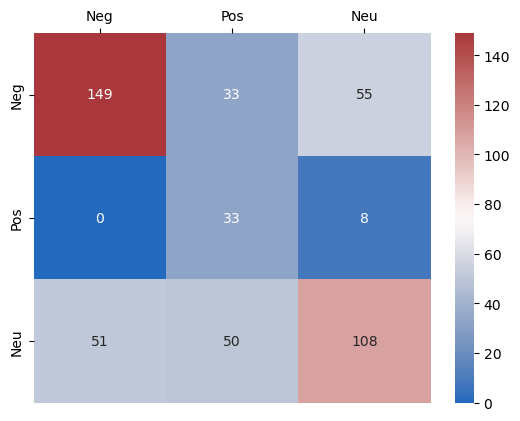

              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68       237
         1.0       0.28      0.80      0.42        41
         2.0       0.63      0.52      0.57       209

    accuracy                           0.60       487
   macro avg       0.55      0.65      0.56       487
weighted avg       0.66      0.60      0.61       487



In [123]:
'''Confusion matrix'''
svc_cm = confusion_matrix(svc_pred,sinal_test)
sns.heatmap(svc_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
svc_cr = classification_report(svc_pred,sinal_test)
print(svc_cr)

# Random Forest
___

In [124]:
'''Random Forest Pipeline'''
rfc_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', RandomForestClassifier())
    ])

In [125]:
rfc_pipeline.fit(text_train,sinal_train)
rfc_pred = rfc_pipeline.predict(text_test)

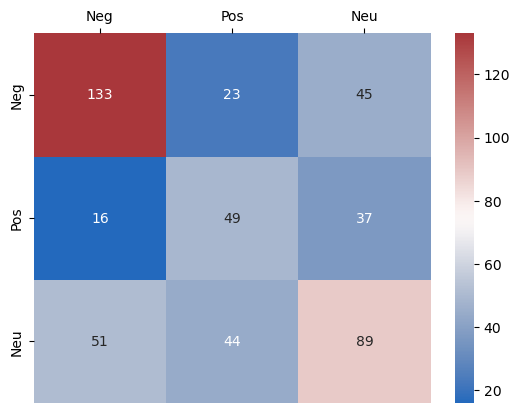

              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66       201
         1.0       0.42      0.48      0.45       102
         2.0       0.52      0.48      0.50       184

    accuracy                           0.56       487
   macro avg       0.54      0.54      0.54       487
weighted avg       0.56      0.56      0.56       487



In [126]:
'''Confusion matrix'''
rfc_cm = confusion_matrix(rfc_pred,sinal_test)
sns.heatmap(rfc_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
rfc_cr = classification_report(rfc_pred,sinal_test)
print(rfc_cr)

# KNN
___

In [127]:
'''KNN Pipeline'''
knn_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])

In [128]:
knn_pipeline.fit(text_train,sinal_train)
knn_pred = knn_pipeline.predict(text_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


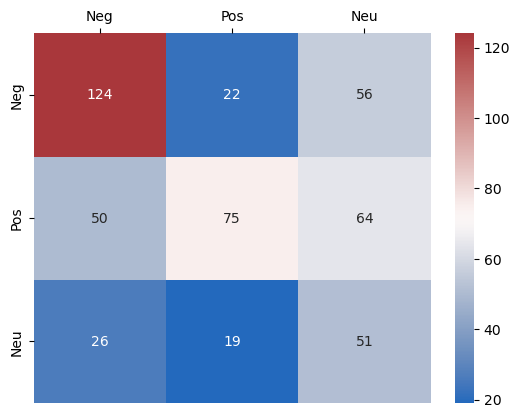

              precision    recall  f1-score   support

         0.0       0.62      0.61      0.62       202
         1.0       0.65      0.40      0.49       189
         2.0       0.30      0.53      0.38        96

    accuracy                           0.51       487
   macro avg       0.52      0.51      0.50       487
weighted avg       0.57      0.51      0.52       487



In [129]:
'''Confusion matrix'''
knn_cm = confusion_matrix(knn_pred,sinal_test)
sns.heatmap(knn_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
knn_cr = classification_report(knn_pred,sinal_test)
print(knn_cr)

# Logistic Regression
___

In [130]:
'''Logistic Regression Pipeline'''
logReg_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', LogisticRegression())
    ])

In [131]:
logReg_pipeline.fit(text_train,sinal_train)
logReg_pred = logReg_pipeline.predict(text_test)

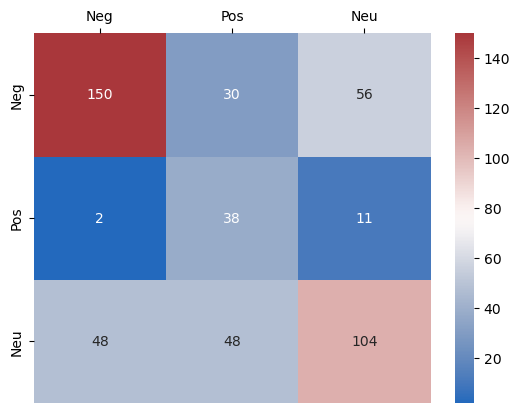

              precision    recall  f1-score   support

         0.0       0.75      0.64      0.69       236
         1.0       0.33      0.75      0.46        51
         2.0       0.61      0.52      0.56       200

    accuracy                           0.60       487
   macro avg       0.56      0.63      0.57       487
weighted avg       0.65      0.60      0.61       487



In [132]:
'''Confusion matrix'''
logReg_cm = confusion_matrix(logReg_pred,sinal_test)
sns.heatmap(logReg_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
logReg_cr = classification_report(logReg_pred,sinal_test)
print(logReg_cr)

# MLP CLassifier 
___

In [133]:
'''MLP CLassifier Pipeline'''
mlp_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MLPClassifier(max_iter=300))
    ])

In [134]:
mlp_pipeline.fit(text_train,sinal_train)
mlp_pred = mlp_pipeline.predict(text_test)

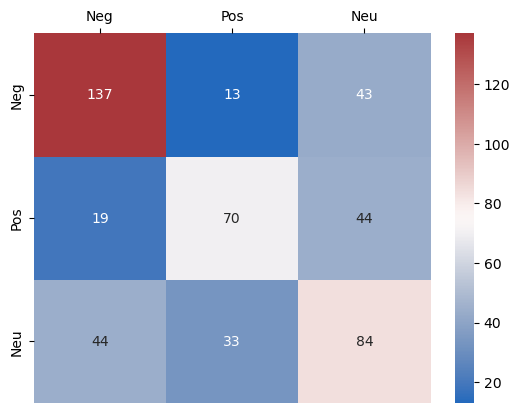

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       193
         1.0       0.60      0.53      0.56       133
         2.0       0.49      0.52      0.51       161

    accuracy                           0.60       487
   macro avg       0.59      0.59      0.59       487
weighted avg       0.60      0.60      0.60       487



In [135]:
'''Confusion matrix'''
mlp_cm = confusion_matrix(mlp_pred,sinal_test)
sns.heatmap(mlp_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
mlp_cr = classification_report(mlp_pred,sinal_test)
print(mlp_cr)

# Naive Bayes
___

In [136]:
'''MLP CLassifier Pipeline'''
mnb_pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer=process_text)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ])

In [137]:
mnb_pipeline.fit(text_train,sinal_train)
mnb_pred = mnb_pipeline.predict(text_test)

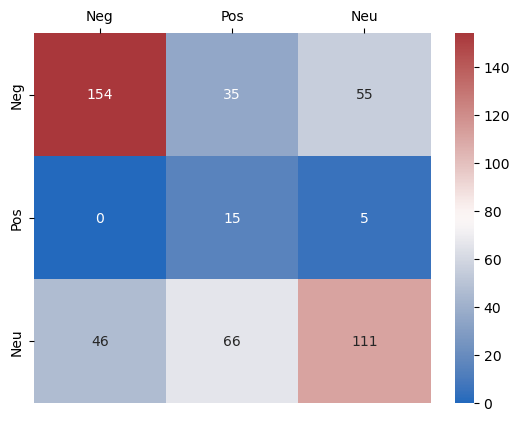

              precision    recall  f1-score   support

         0.0       0.77      0.63      0.69       244
         1.0       0.13      0.75      0.22        20
         2.0       0.65      0.50      0.56       223

    accuracy                           0.57       487
   macro avg       0.52      0.63      0.49       487
weighted avg       0.69      0.57      0.61       487



In [138]:
'''Confusion matrix'''
mnb_cm = confusion_matrix(mnb_pred,sinal_test)
sns.heatmap(mnb_cm,annot=True,cmap='vlag',fmt='d',xticklabels=['Neg','Pos','Neu'],yticklabels=['Neg','Pos','Neu']).xaxis.tick_top()
plt.show()

'''Classification Report'''
mnb_cr = classification_report(mnb_pred,sinal_test)
print(mnb_cr)